# Case Study 2: How Can a Wellness Technology Company Play It Smart?

## Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy.

## Ask
Sršen asks you to analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. She then wants you to select one Bellabeat product to apply these insights to in your presentation. These
questions will guide your analysis:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?
You will produce a report with the following deliverables:
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

## Prepare
Sršen encourages you to use public data that explores smart device users’ daily habits. She points you to a specific data set: ● FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. Sršen tells you that this data set might
have some limitations, and encourages you to consider adding another data to help address those limitations as you begin to work more with this data.

## Process
Case Study Roadmap - Process
Guiding questions
● What tools are you choosing and why?
● Have you ensured your data’s integrity?
● What steps have you taken to ensure that your data is clean?
● How can you verify that your data is clean and ready to analyze?
● Have you documented your cleaning process so you can review and share those results?
Key tasks
1. Check the data for errors.
2. Choose your tools.
3. Transform the data so you can work with it effectively.
4. Document the cleaning process.
Deliverable
Documentation of any cleaning or manipulation of data

## Analyze
Now that your data is stored appropriately and has been prepared for analysis, start putting it to work.

## **STEP 1:** installing packages:

In [4]:
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("plyr")
install.packages("janitor")
install.packages("dplyr")

# library that is going to be needed:
library(tidyverse)
library(ggplot2)
library(readr)
library(plyr)
library(janitor)
library(lubridate)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
-------------------------------------------------------------

## **STEP 2:** collecting data




In [5]:
#creating data frame with sleep data
sleep_data <- read.csv("/content/sleepDay_merged.csv")
head(sleep_data)

#creating data frame with acitivity data
daily_activity <- read.csv("/content/dailyActivity_merged.csv")
head(daily_activity)

#creating data frame with hourly calories
hour_calories <- read.csv("/content/hourlyCalories_merged.csv")
head(hour_calories)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


visualizing data

In [6]:
print("===>COLUMN NAMES<===")
print(colnames(sleep_data))
print("==============================")
print(colnames(daily_activity))
print("==============================")
print(colnames(hour_calories))



[1] "===>COLUMN NAMES<==="
[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"    
[1] "=============================="
 [1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"                
[1] "=============================="
[1] "Id"           "ActivityHour" "Calories"    


## **STEP 3:** Cleaning data


Checking if there is any NA on the data frames or duplicate

In [7]:
count(is.na(sleep_data)== TRUE)
count(is.na(daily_activity) == TRUE)
count(is.na(hour_calories) == TRUE)

sum(duplicated(sleep_data))
sum(duplicated(daily_activity))
sum(duplicated(hour_calories))

x.Id,x.SleepDay,x.TotalSleepRecords,x.TotalMinutesAsleep,x.TotalTimeInBed,freq
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>
FALSE,FALSE,FALSE,FALSE,FALSE,413


x.Id,x.ActivityDate,x.TotalSteps,x.TotalDistance,x.TrackerDistance,x.LoggedActivitiesDistance,x.VeryActiveDistance,x.ModeratelyActiveDistance,x.LightActiveDistance,x.SedentaryActiveDistance,x.VeryActiveMinutes,x.FairlyActiveMinutes,x.LightlyActiveMinutes,x.SedentaryMinutes,x.Calories,freq
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<int>
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,940


x.Id,x.ActivityHour,x.Calories,freq
<lgl>,<lgl>,<lgl>,<int>
FALSE,FALSE,FALSE,22099


[1] 3

[1] 0

[1] 0

as we can see: there are 3 duplicates in sleep_day
we are going to fix that

In [8]:
sleep_data <- sleep_data[!duplicated(sleep_data), ]
sum(duplicated(sleep_data))

[1] 0

now i'm going to change the type of title of the columns

In [9]:
sleep_data <- clean_names(sleep_data, case = "snake")
daily_activity <- clean_names(daily_activity, case = "snake")
hour_calories <- clean_names(hour_calories, case = "snake")

converting minutes to hours on sleep_day data frame


In [10]:
sleep_data <- sleep_data %>%
  mutate(sleeping = total_minutes_asleep/60) %>%
  mutate(in_bed = total_time_in_bed/60)
head(sleep_data)

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,sleeping,in_bed
,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,5.450000,5.766667
2,1503960366,4/13/2016 12:00:00 AM,2,384,407,6.400000,6.783333
3,1503960366,4/15/2016 12:00:00 AM,1,412,442,6.866667,7.366667
4,1503960366,4/16/2016 12:00:00 AM,2,340,367,5.666667,6.116667
5,1503960366,4/17/2016 12:00:00 AM,1,700,712,11.666667,11.866667
6,1503960366,4/19/2016 12:00:00 AM,1,304,320,5.066667,5.333333


converting to datetime hour_calories

In [11]:
hour_calories$date <- as.POSIXct(hour_calories$activity_hour, format = "%m/%d/%Y %I:%M:%S %p")

let's see if it worked

In [12]:
as_tibble(hour_calories)

id,activity_hour,calories,date
<dbl>,<chr>,<int>,<dttm>
1503960366,4/12/2016 12:00:00 AM,81,2016-04-12 00:00:00
1503960366,4/12/2016 1:00:00 AM,61,2016-04-12 01:00:00
1503960366,4/12/2016 2:00:00 AM,59,2016-04-12 02:00:00
1503960366,4/12/2016 3:00:00 AM,47,2016-04-12 03:00:00
1503960366,4/12/2016 4:00:00 AM,48,2016-04-12 04:00:00
1503960366,4/12/2016 5:00:00 AM,48,2016-04-12 05:00:00
1503960366,4/12/2016 6:00:00 AM,48,2016-04-12 06:00:00
1503960366,4/12/2016 7:00:00 AM,47,2016-04-12 07:00:00
1503960366,4/12/2016 8:00:00 AM,68,2016-04-12 08:00:00


transforming to day of week

In [13]:
head(hour_calories)

,id,activity_hour,calories,date
,<dbl>,<chr>,<int>,<dttm>
1,1503960366,4/12/2016 12:00:00 AM,81,2016-04-12 00:00:00
2,1503960366,4/12/2016 1:00:00 AM,61,2016-04-12 01:00:00
3,1503960366,4/12/2016 2:00:00 AM,59,2016-04-12 02:00:00
4,1503960366,4/12/2016 3:00:00 AM,47,2016-04-12 03:00:00
5,1503960366,4/12/2016 4:00:00 AM,48,2016-04-12 04:00:00
6,1503960366,4/12/2016 5:00:00 AM,48,2016-04-12 05:00:00


In [14]:
#sleep day
sleep_data$date <- mdy_hms(sleep_data$sleep_day)
sleep_data$day_of_week <- weekdays(sleep_data$date)

#daily activity
daily_activity$date <- mdy(daily_activity$activity_date)
daily_activity$day_of_week <- weekdays(daily_activity$date)

#calories
hour_calories$day_of_week <- weekdays(hour_calories$date)

before taking the next step, I want to see how many unique IDs we have in each data frame

In [17]:
print("Unique sleep_day")
sleep_data$id <- as.character(sleep_data$id)
unique(sleep_data$id)
length(unique(sleep_data$id))
print("Unique daily_activity")
daily_activity$id <- as.character(daily_activity$id)
unique(daily_activity$id)
length(unique(daily_activity$id))
print("Unique hour_calories")
hour_calories$id <- as.character(hour_calories$id)
unique(hour_calories$id)
length(unique(hour_calories$id))

[1] "Unique sleep_day"


[1] "1503960366" "1644430081" "1844505072" "1927972279" "2026352035"
 [6] "2320127002" "2347167796" "3977333714" "4020332650" "4319703577"
[11] "4388161847" "4445114986" "4558609924" "4702921684" "5553957443"
[16] "5577150313" "6117666160" "6775888955" "6962181067" "7007744171"
[21] "7086361926" "8053475328" "8378563200" "8792009665"

[1] 24

[1] "Unique daily_activity"


[1] "1503960366" "1624580081" "1644430081" "1844505072" "1927972279"
 [6] "2022484408" "2026352035" "2320127002" "2347167796" "2873212765"
[11] "3372868164" "3977333714" "4020332650" "4057192912" "4319703577"
[16] "4388161847" "4445114986" "4558609924" "4702921684" "5553957443"
[21] "5577150313" "6117666160" "6290855005" "6775888955" "6962181067"
[26] "7007744171" "7086361926" "8053475328" "8253242879" "8378563200"
[31] "8583815059" "8792009665" "8877689391"

[1] 33

[1] "Unique hour_calories"


[1] "1503960366" "1624580081" "1644430081" "1844505072" "1927972279"
 [6] "2022484408" "2026352035" "2320127002" "2347167796" "2873212765"
[11] "3372868164" "3977333714" "4020332650" "4057192912" "4319703577"
[16] "4388161847" "4445114986" "4558609924" "4702921684" "5553957443"
[21] "5577150313" "6117666160" "6290855005" "6775888955" "6962181067"
[26] "7007744171" "7086361926" "8053475328" "8253242879" "8378563200"
[31] "8583815059" "8792009665" "8877689391"

[1] 33

Insights:
*   sleep_day = 24 unique ID's
*   daily_activity = 33 unique ID's
*   hour_calories = 33 unique ID's

they all match except for sleep_day that doesn't all ID's






## **STEP 4:** Analysis

In [18]:
cat("The average of sleeping time : ", mean(sleep_data$sleeping),"\n")
cat("The average of time in bed: " ,mean(sleep_data$in_bed),"\n")
cat("The average burning calories/daily: ",mean(daily_activity$calories),"\n")
cat("The average of sedentaty time: ",mean(daily_activity$sedentary_minutes),"\n")
cat("The average of active time: ",mean(daily_activity$very_active_minutes+daily_activity$fairly_active_minutes))

The average of sleeping time :  6.98622 
The average of time in bed:  7.641382 
The average burning calories/daily:  2303.61 
The average of sedentaty time:  991.2106 
The average of active time:  34.72979

#*Insight 1:*


*   Users spend 1h more in bed then sleeping, that is normal, since people usually takes time to go to sleep because of insomnia or other motives, or likes to spend some time in bed before getting up in the morning.
*   The active time and sedentary time it's very worrying, since it's almost 30 times more sedentary time then active.




average of total steps and calories by user

In [19]:
aggregate(cbind(total_steps, calories)~id,daily_activity, mean)

id,total_steps,calories
<chr>,<dbl>,<dbl>
1503960366,12116.742,1816.419
1624580081,5743.903,1483.355
1644430081,7282.967,2811.300
1844505072,2580.065,1573.484
1927972279,916.129,2172.806
2022484408,11370.645,2509.968
2026352035,5566.871,1540.645
2320127002,4716.871,1724.161
2347167796,9519.667,2043.444


In [20]:
mean(daily_activity$total_steps)
mean(daily_activity$calories)

[1] 7637.911

[1] 2303.61

#*Insight 2:*



*   The CDC recommend that most adults aim for 10,000 steps per day.
*   As we can see in our analysis only a few reach the recommended steps and users are around 2.500 steps behind the recommendation

#*Insight 3*



*   Adults need from 1,600 - 3,000 calories per day
*   As we can see the users are burning calories as expected on their daily activities






now the average calories thats is burned by hour



In [21]:
hour_calories <- hour_calories %>%
  mutate(burning_calories_time = hour(date))

mean(hour_calories$burning_calories_time)

[1] 11.41577

Now lets see the average steps by user, and if they reach the recommended 10.000 steps

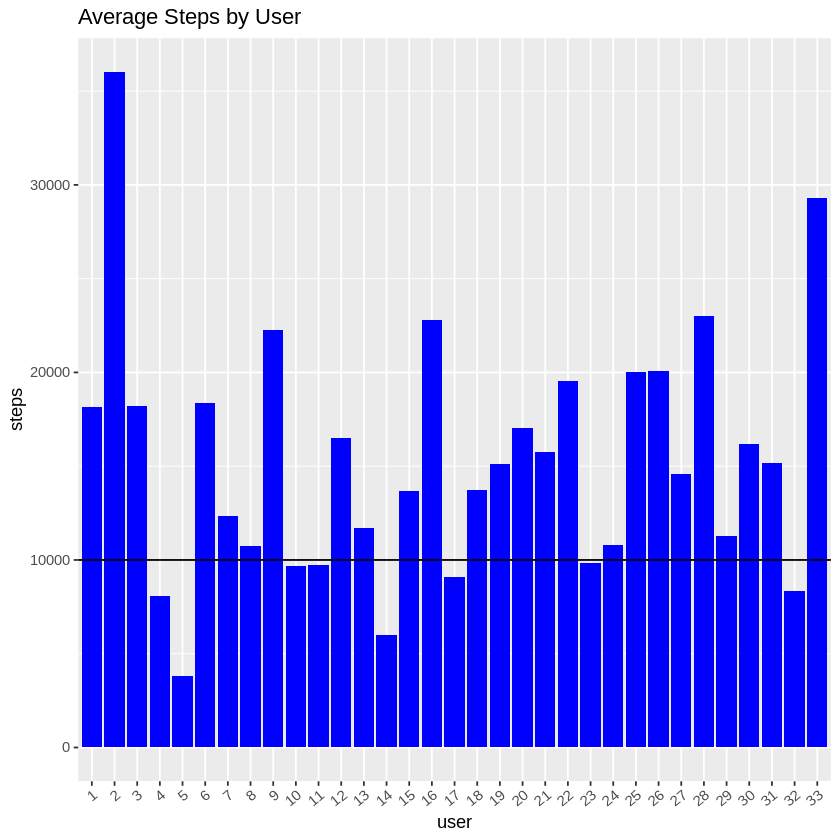

In [22]:
# Convert id column to factor
daily_activity$id <- as.factor(daily_activity$id)

# Your ggplot code with changes
ggplot(daily_activity, aes(x = id, y = total_steps)) +
  geom_bar(stat = "identity", fill = "blue", position = position_dodge(width = 0.5)) +
  labs(title = "Average Steps by User", x = "user", y = "steps") +
  geom_hline(yintercept = 10000) +
  theme(axis.text.x = element_text(angle = 40, hjust = 1)) +
  scale_x_discrete(labels = 1:33)

# *Insight 4:*

As the graphic shows us, there are people below the recommended steps and people that reach them and others that go further.


Let's see the relationship between the sendetary minutes and the total steps, to see if our users are more active or sendentarys

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


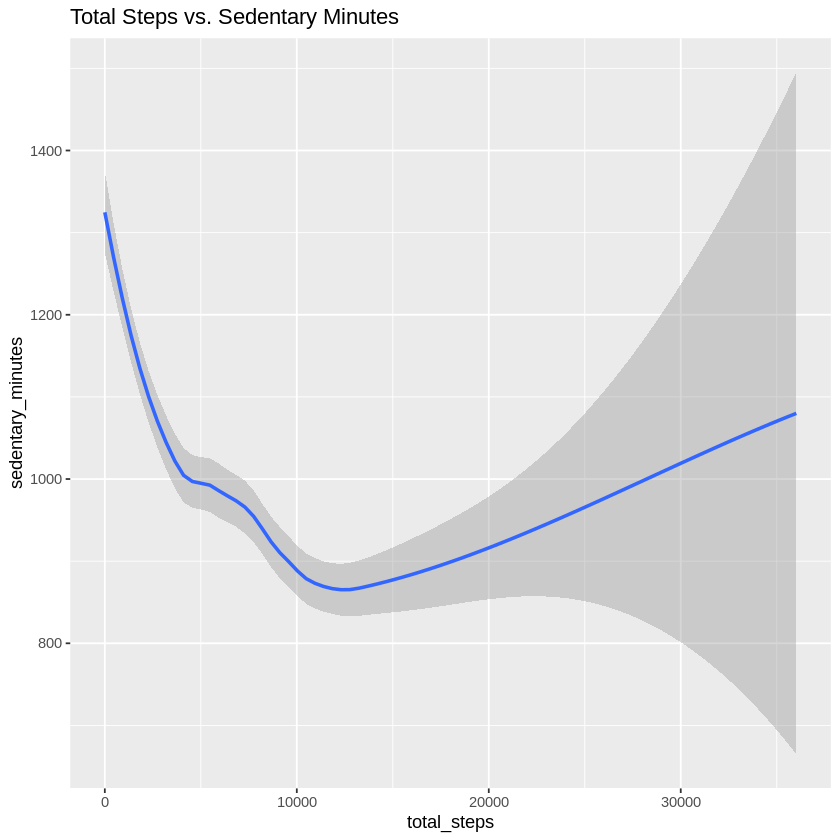

In [23]:
ggplot(daily_activity, aes(x=total_steps, y=sedentary_minutes)) +
  geom_smooth() +
    labs(title="Total Steps vs. Sedentary Minutes")

# *Insight 5:*
As mentioned before, when user has more steps, they will likely to have less sedentary minutes.
In the other hand, when the user has more sedentary minutes, it's more likely that will have less steps

Now lets see the relationship between time in bed and sleeping

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


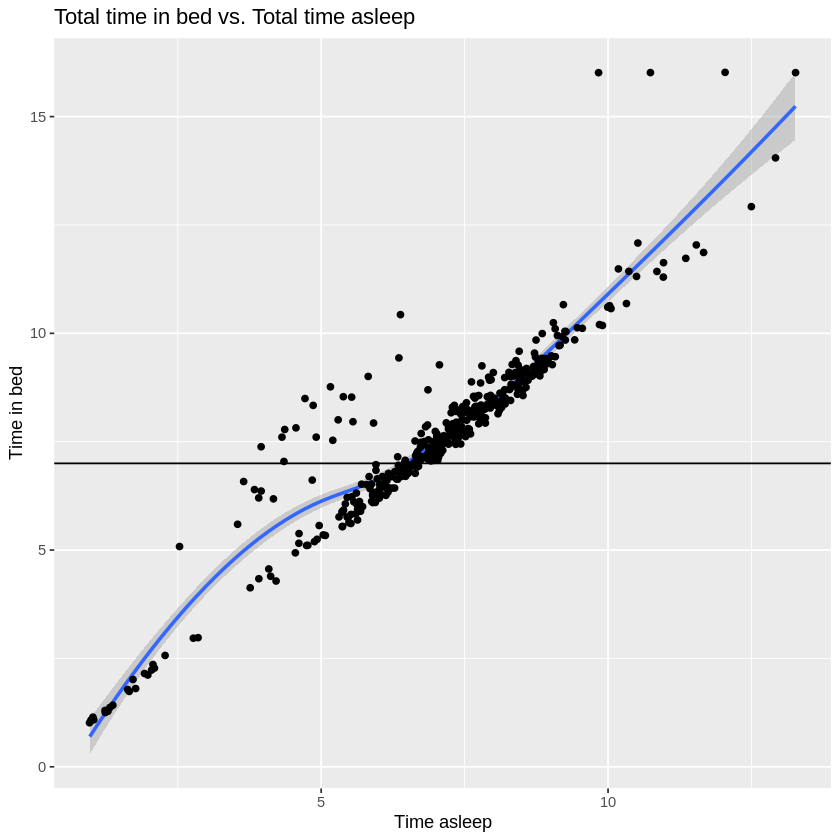

In [24]:
ggplot(data=sleep_data, mapping = aes(x=sleeping, y=in_bed)) +
  geom_smooth() +
  geom_jitter() +
  geom_hline(yintercept = 7) +
  labs(title = "Total time in bed vs. Total time asleep", x= "Time asleep", y="Time in bed")

# *Insight 6:*
Most users are sleeping the 7 hours recommended

Relationship between steps vs. calories

#Conclusion:



*   As we saw in previous insights the users usually get the recommended 7h sleeps
*   They also reach the recommended 10.000 steps per day

*   But still they are now having a healthy fitness life, they spend too much sedentary time

#Recommendation:



*   People like rewards in theis apps, so put a daily goal, weekly and monthly, so when the goal it's achieved, the user gain points and can exchange inside the app.
Since the app also sells tangible items, it could sell some smaller items with discounts when using their points, or if the user has the same ammount of points to buy the product, it could exchange the points for the free product only paying the delivery tax.
*   Recipies for woman that are looking for loosing weight or maintain a diet, and tips of foods and healthy quick-meals
*   Notification when its time to go to bed
*   White noise in the app to help users to sleep better
*   Control of calories consumption
*   Activity tips for inside or outside/gym activities

#Target:
Woman's that are willing to change how their diet and how do more healthy activities.



